In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('used_cars.csv')

In [3]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,...,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,...,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


In [57]:
len(df)

20001

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'vin', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'county', 'state', 'lat',
       'long'],
      dtype='object')

Decide which columns of data we would like to keep

In [6]:
df.drop(['Unnamed: 0', 'id', 'url', 'region_url', 'lat', 'long'], axis=1, inplace=True)

In [7]:
df.sample(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state
3352,vermont,15465,2015.0,honda,cr-v,excellent,4 cylinders,gas,69807.0,clean,automatic,2HKRM4H57FH690215,4wd,NaN,NaN,black,https://images.craigslist.org/01515_hzx4RGcc7S...,"2015 Honda CR-V EX, ONE OWNER, CLEAN CARFAX HI...",NaN,vt
17758,bellingham,18995,2016.0,jeep,liberty,excellent,4 cylinders,gas,45125.0,clean,automatic,1C4PJMDB7GW162021,4wd,sub-compact,SUV,white,https://images.craigslist.org/00I0I_l4095Xt6QU...,Just in time for Holiday and Winter travel. Ni...,NaN,wa
14969,roanoke,5995,2007.0,gmc,yukon xl sle,good,8 cylinders,gas,218737.0,clean,automatic,1GKFK16387J197343,4wd,full-size,SUV,red,https://images.craigslist.org/00d0d_6ZWwUu6e7O...,Public announcement: If you want to test drive...,NaN,va
6602,fredericksburg,2000,2002.0,honda,accord ex,good,4 cylinders,gas,166000.0,clean,automatic,NaN,fwd,full-size,sedan,NaN,https://images.craigslist.org/00I0I_4DBke6sgxc...,I am selling my car in good condition . It has...,NaN,va
19479,bellingham,11499,2014.0,chrysler,town and country fwd,NaN,NaN,gas,95755.0,clean,automatic,2C4RC1BG5ER117262,fwd,NaN,van,black,https://images.craigslist.org/00F0F_5otROkdMqb...,2014 Chrysler Town And Country Touring FWD **C...,NaN,wa


We found that county was another column we would like to drop

In [8]:
df.drop(['county'], axis=1, inplace=True)

In [9]:
df.drop(['vin'], axis=1, inplace=True)

In [10]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'image_url', 'description',
       'state'],
      dtype='object')

Rename some columns to make the easier to use later on in the study

In [11]:
col_names= ['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title', 'transmission',
       'drive', 'size', 'type', 'color', 'image_url', 'description',
       'state']

In [12]:
df.columns= col_names

In [13]:
df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title', 'transmission', 'drive',
       'size', 'type', 'color', 'image_url', 'description', 'state'],
      dtype='object')

In [14]:
df.dtypes

region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title            object
transmission     object
drive            object
size             object
type             object
color            object
image_url        object
description      object
state            object
dtype: object

Convert year from float to int. Did not use datetime because we do not have months or days. 

In [15]:
df['year'] = df['year'].apply("int64")

In [16]:
df.dtypes

region           object
price             int64
year              int64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title            object
transmission     object
drive            object
size             object
type             object
color            object
image_url        object
description      object
state            object
dtype: object

In [17]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title,transmission,drive,size,type,color,image_url,description,state
0,salt lake city,17899,2012,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,ut
1,salt lake city,0,2016,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,ut
2,salt lake city,46463,2015,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,ut
3,salt lake city,0,2016,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,ut
4,salt lake city,49999,2018,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,ut


Convert odometer from float to int

In [18]:
df['odometer'] = df['odometer'].apply("int64")

In [19]:
df.dtypes

region          object
price            int64
year             int64
manufacturer    object
model           object
condition       object
cylinders       object
fuel            object
odometer         int64
title           object
transmission    object
drive           object
size            object
type            object
color           object
image_url       object
description     object
state           object
dtype: object

In [20]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title,transmission,drive,size,type,color,image_url,description,state
0,salt lake city,17899,2012,volkswagen,golf r,excellent,4 cylinders,gas,63500,clean,manual,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,ut
1,salt lake city,0,2016,ford,f-150,excellent,NaN,gas,10,clean,automatic,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,ut
2,salt lake city,46463,2015,gmc,sierra 1500,excellent,NaN,gas,7554,clean,automatic,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,ut
3,salt lake city,0,2016,ford,f-150,excellent,NaN,gas,10,clean,automatic,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,ut
4,salt lake city,49999,2018,ford,f-450,NaN,NaN,diesel,70150,clean,automatic,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,ut


Drop all nan rows

In [21]:
df1 = df.dropna()

In [22]:
len(df1)

4725

Remove all rows where price<100 or price>500000

In [23]:
df2 = (df1[df1.price >= 100])

In [24]:
df3 = (df2[df2.price <= 500000])

In [25]:
df3.price.sample(10)

10806     7000
3488     34995
9089      1000
2760      9998
14555     2800
16299    14500
12689     2500
11297     4999
15568     5800
2125     12498
Name: price, dtype: int64

In [26]:
len(df3)

4582

In [27]:
df3.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title,transmission,drive,size,type,color,image_url,description,state
0,salt lake city,17899,2012,volkswagen,golf r,excellent,4 cylinders,gas,63500,clean,manual,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,ut
24,salt lake city,4600,2008,honda,civic,good,4 cylinders,gas,110982,clean,automatic,fwd,mid-size,sedan,grey,https://images.craigslist.org/00F0F_iyJxhCTmYP...,Selling this 2008 Honda Civic 1.8L four door L...,ut
48,salt lake city,28000,2004,ford,f550 mechanics service,good,10 cylinders,gas,67348,clean,automatic,4wd,full-size,truck,white,https://images.craigslist.org/01414_iVqrz2Dm9q...,Mechanics Service Truck 2004 Ford F550 4x4 Ext...,ut
57,salt lake city,2500,2004,ford,mustang,good,6 cylinders,gas,129000,clean,manual,rwd,full-size,coupe,blue,https://images.craigslist.org/00707_dEYC3x1Ane...,"Hi every1, I want to sell my own car. This car...",ut
109,st george,12000,2015,volkswagen,jetta,like new,4 cylinders,gas,65000,clean,automatic,fwd,full-size,sedan,white,https://images.craigslist.org/00e0e_4gHaTRIl3I...,Selling my because im am looking for a truck ...,ut


These next cells show how complete the data is. df2 has no missing data. df1 has no missing data, but on some rows price was listed as less than 100 or more than 500000, which are extremely likely to be incorrect so they were removed.

In [28]:
df.count()

region          20001
price           20001
year            20001
manufacturer    19296
model           19736
condition       10849
cylinders       12916
fuel            19928
odometer        20001
title           19891
transmission    19811
drive           15359
size             6886
type            16342
color           14487
image_url       20001
description     20001
state           20001
dtype: int64

In [29]:
len(df)

20001

In [30]:
df1.count()

region          4725
price           4725
year            4725
manufacturer    4725
model           4725
condition       4725
cylinders       4725
fuel            4725
odometer        4725
title           4725
transmission    4725
drive           4725
size            4725
type            4725
color           4725
image_url       4725
description     4725
state           4725
dtype: int64

In [31]:
len(df1)

4725

In [32]:
df2.count()

region          4583
price           4583
year            4583
manufacturer    4583
model           4583
condition       4583
cylinders       4583
fuel            4583
odometer        4583
title           4583
transmission    4583
drive           4583
size            4583
type            4583
color           4583
image_url       4583
description     4583
state           4583
dtype: int64

In [33]:
len(df2)

4583

In [34]:
df3.count()

region          4582
price           4582
year            4582
manufacturer    4582
model           4582
condition       4582
cylinders       4582
fuel            4582
odometer        4582
title           4582
transmission    4582
drive           4582
size            4582
type            4582
color           4582
image_url       4582
description     4582
state           4582
dtype: int64

In [35]:
len(df3)

4582

In [36]:
df3.describe()

,price,year,odometer
count,4582.000000,4582.000000,4.582000e+03
mean,10817.589044,2008.118725,-8.756366e+17
std,9313.795503,7.983576,2.703919e+18
min,265.000000,1917.000000,-9.223372e+18
25%,4790.000000,2005.000000,5.400000e+04
50%,7742.500000,2009.000000,1.080000e+05
75%,14500.000000,2013.000000,1.481162e+05
max,135000.000000,2020.000000,2.500005e+06


In [37]:
df3.describe().apply(lambda s: s.apply('{0:.0f}'.format))

,price,year,odometer
count,4582,4582,4582
mean,10818,2008,-875636585777246208
std,9314,8,2703919044588838400
min,265,1917,-9223372036854775808
25%,4790,2005,54000
50%,7742,2009,108000
75%,14500,2013,148116
max,135000,2020,2500005


In [38]:
df4 = (df3[df3.odometer >= 10])

In [39]:
df4.describe().apply(lambda s: s.apply('{0:.0f}'.format))

,price,year,odometer
count,4131,4131,4131
mean,10932,2008,117593
std,9226,7,86338
min,265,1917,22
25%,4900,2005,74097
50%,7990,2009,116856
75%,14950,2013,152224
max,135000,2020,2500005


In [40]:
df5 = (df4[df4.odometer <= 450000])

In [41]:
df5.describe().apply(lambda s: s.apply('{0:.0f}'.format))

,price,year,odometer
count,4125,4125,4125
mean,10945,2008,115418
std,9227,7,59858
min,265,1917,22
25%,4950,2005,74097
50%,7990,2009,116783
75%,14989,2013,152000
max,135000,2020,417000


In [42]:
df5.sample(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title,transmission,drive,size,type,color,image_url,description,state
15716,roanoke,6990,2013,ford,edge se,excellent,6 cylinders,gas,135820,clean,automatic,fwd,mid-size,SUV,white,https://images.craigslist.org/00c0c_8sKy3Yq7cN...,Best Roanoke Auto Sales is located in the beau...,va
2796,vermont,7998,2012,dodge,grand caravan se,good,6 cylinders,gas,107942,clean,automatic,fwd,full-size,van,red,https://images.craigslist.org/00w0w_6rN49xg9Fs...,PLEASE VIEW THE FREE CARFAX HISTORY REPORT AT ...,vt
13014,richmond,14990,2010,ford,econoline,good,8 cylinders,gas,53366,clean,automatic,rwd,full-size,truck,white,https://images.craigslist.org/00w0w_leXh6Ll1VY...,2010 Ford Econoline E-450 LAWN MAINTENANCE **...,va
3009,vermont,12998,2017,volkswagen,jetta,excellent,4 cylinders,gas,57078,clean,automatic,fwd,full-size,sedan,red,https://images.craigslist.org/00E0E_dtGHm3RB8x...,********2017 VOLKSWAGEN JETTA 1.4T S******** ...,vt
589,st george,10500,1964,chevrolet,el camino,good,8 cylinders,gas,50000,clean,automatic,rwd,mid-size,truck,blue,https://images.craigslist.org/00C0C_g6SYysEdR7...,"1964 Chevy El Camino $10,500 OBO - CASH ONLY -...",ut
11635,richmond,2400,2008,nissan,altima 2.5l sedan,good,4 cylinders,gas,232108,clean,automatic,fwd,full-size,sedan,blue,https://images.craigslist.org/00N0N_lSf5NlA28T...,WE ARE A VA LICENSED USED CAR DEALER LOCATED I...,va
2843,vermont,3900,2002,toyota,highlander,good,6 cylinders,gas,140132,clean,automatic,4wd,mid-size,SUV,custom,https://images.craigslist.org/00T0T_4LCuj5xyx9...,I got 2002 Toyota Highlander V6 4wd runs great...,vt
8336,norfolk / hampton roads,7500,2012,volkswagen,jetta 2.5l se,excellent,5 cylinders,gas,61000,clean,automatic,fwd,mid-size,sedan,white,https://images.craigslist.org/00j0j_9P7bU7jxTO...,For Sale is my 2012 Volkswagen Jetta SE. Super...,va
17106,bellingham,4000,1988,toyota,pickup,fair,4 cylinders,gas,312000,clean,manual,4wd,full-size,truck,blue,https://images.craigslist.org/00i0i_8KD6n7T0BA...,1988 Toyota Pickup $4000 obo 5 speed manual tr...,wa
8821,norfolk / hampton roads,14490,2015,subaru,crosstrek limited,like new,4 cylinders,gas,70189,clean,automatic,4wd,full-size,SUV,silver,https://images.craigslist.org/00k0k_jVkDpk5Qvb...,2014 SUBARU CROSSTREK LIMITED PACKAGE AWD WITH...,va


In [43]:
df5.drop(['image_url'],axis=1, inplace=True)

/tmp/ipykernel_13120/2021074495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.drop(['image_url'],axis=1, inplace=True)


In [58]:
len(df5)

4125

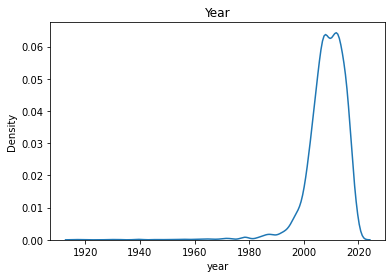

In [91]:
sns.kdeplot(df5['year']).set(title='Year')
plt.savefig('yearsns.png')

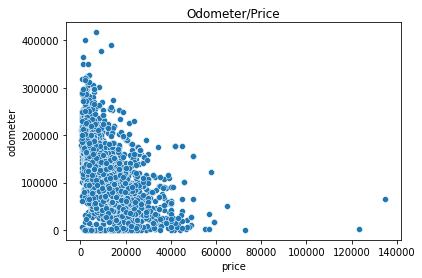

In [94]:
sns.scatterplot(y=df5['odometer'], x=df5['price']).set(title='Odometer/Price')
plt.savefig('OdometerPrice.png')

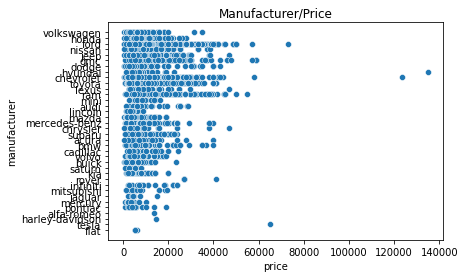

In [95]:
sns.scatterplot(y=df5['manufacturer'], x=df5['price']).set(title='Manufacturer/Price')
plt.savefig('ManufacturerPrice.png')

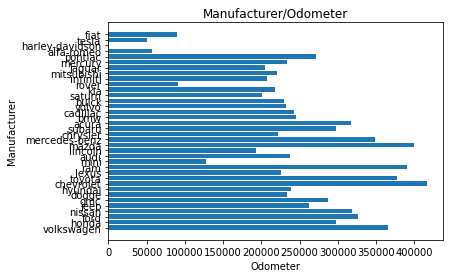

In [96]:
plt.barh(df5.manufacturer, df5.odometer)
plt.title('Manufacturer/Odometer')
plt.ylabel('Manufacturer')
plt.xlabel('Odometer')
plt.savefig('ManufacturerOdometer.png')

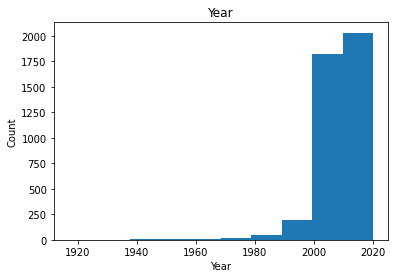

In [97]:
plt.hist(df5.year)
plt.title('Year')
plt.ylabel('Count')
plt.xlabel('Year')
plt.savefig('YearMPL.png')

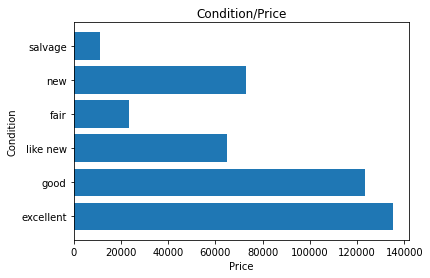

In [98]:
plt.barh(df5.condition,df5.price)
plt.title('Condition/Price')
plt.ylabel('Condition')
plt.xlabel('Price')
plt.savefig('ConditionPrice.png')

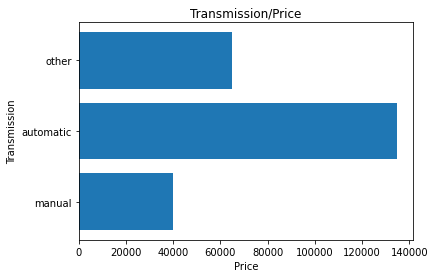

In [99]:
plt.barh(df5.transmission,df5.price)
plt.title('Transmission/Price')
plt.ylabel('Transmission')
plt.xlabel('Price')
plt.savefig('TransmissionPrice.png')

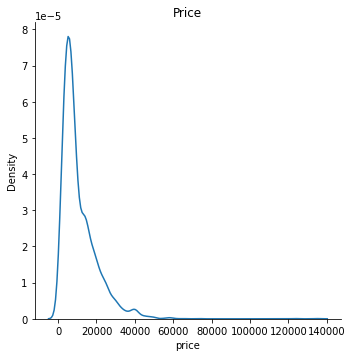

In [100]:
sns.displot(df5.price, kind="kde").set(title='Price')
plt.savefig('Price.png')

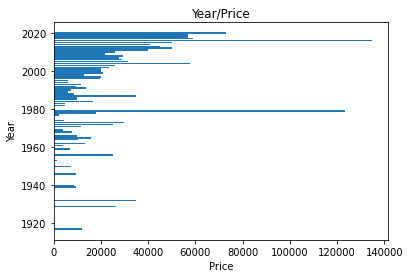

In [101]:
plt.barh(df5.year,df5.price)
plt.title('Year/Price')
plt.ylabel('Year')
plt.xlabel('Price')
plt.savefig('YearPrice.png')

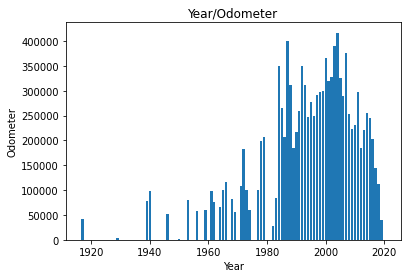

In [102]:
plt.bar(df5.year, df5.odometer)
plt.title('Year/Odometer')
plt.ylabel('Odometer')
plt.xlabel('Year')
plt.savefig('YearOdometer.png')